In [ ]:
pip install tensorflow

In [11]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Loading and Preprocessing the Diabetes Dataset
# Load the diabetes dataset from sklearn
diabetes = load_diabetes()

# Convert the dataset into a pandas DataFrame for easier handling
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target (progression of diabetes) to the DataFrame
diabetes_df['target'] = diabetes.target

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(diabetes_df.head())

First few rows of the dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [12]:
# Check if there are any missing values
print("\nChecking for missing values:")
print(diabetes_df.isnull().sum())

# Separate features and target variable
X = diabetes_df.drop('target', axis=1)  
y = diabetes_df['target'] 


Checking for missing values:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [13]:
# Normalize the features using StandardScaler to ensure better ANN performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Summary statistics for the dataset:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.76190

E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


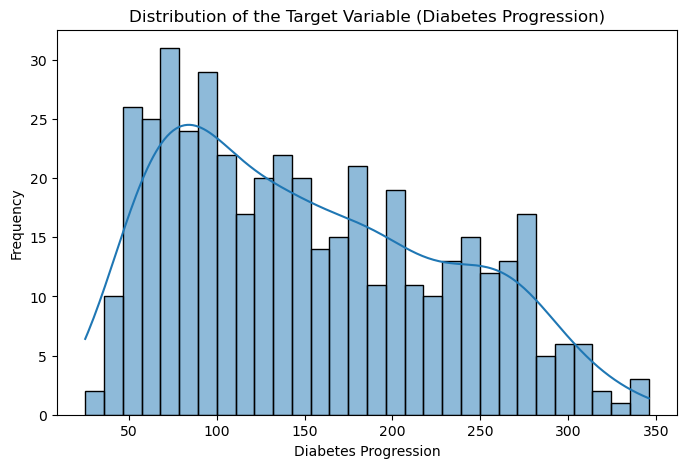

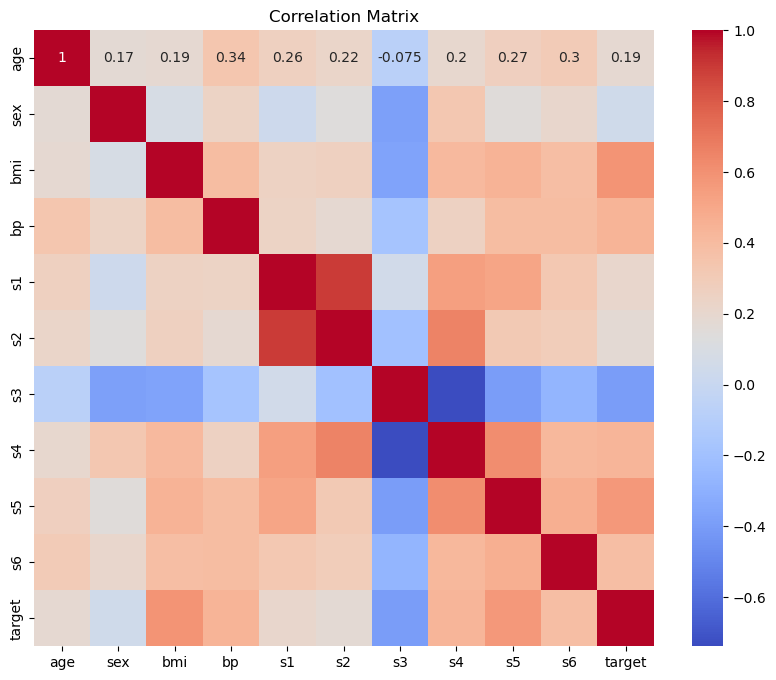

In [14]:
# Step 2: Exploratory Data Analysis (EDA)
# Display summary statistics for the features and target
print("\nSummary statistics for the dataset:")
print(diabetes_df.describe())

# Visualizing relationships between features and target variable
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(diabetes_df['target'], bins=30, kde=True)
plt.title("Distribution of the Target Variable (Diabetes Progression)")
plt.xlabel("Diabetes Progression")
plt.ylabel("Frequency")
plt.show()

# Visualizing the correlation between features and target variable
plt.figure(figsize=(10, 8))
correlation_matrix = diabetes_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [15]:
# Step 3: Building the ANN Model
# Initialize the ANN model
model = Sequential()

# Add input layer and one hidden layer
model.add(Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)))

# Add output layer (regression task, so no activation function)
model.add(Dense(1))

E:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Step 4: Training the ANN Model
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Compile the model using an appropriate optimizer and loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the training data
print("\nTraining the ANN model...")
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Training the ANN model...
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - loss: 31387.9902 - val_loss: 26404.5117
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 29846.2246 - val_loss: 26304.9316
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 28909.2812 - val_loss: 26204.0879
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30153.6680 - val_loss: 26105.7363
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31196.8516 - val_loss: 26005.6270
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 28616.3828 - val_loss: 25908.7070
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26709.7129 - val_loss: 25806.2383
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 28182.8906 - val_loss: 25694.1289
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28848.6797 - val_loss: 25572.7637
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27900.4961 - val_loss: 25440.8574
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━

In [17]:
# Step 5: Evaluating the Model
# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance using Mean Squared Error and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance on Testing Data:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Model Performance on Testing Data:
Mean Squared Error (MSE): 4581.07
R² Score: 0.14


E:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training the improved ANN model...
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 31674.9062 - val_loss: 26072.9883
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29640.1875 - val_loss: 25449.9766
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27978.5234 - val_loss: 24593.4082
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26902.2461 - val_loss: 23383.7773
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26396.8945 - val_loss: 21684.6445
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23045.7148 - val_loss: 19427.4043
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21792.9062 - val_loss: 16602.6875
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 17769.6719 - val_loss: 13389.9258
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14158.3096 - val_loss: 10224.1924
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10775.2979 - val_loss: 7527.6680
Epoch 11/100
12/12 ━━━━━━━━━━━━━

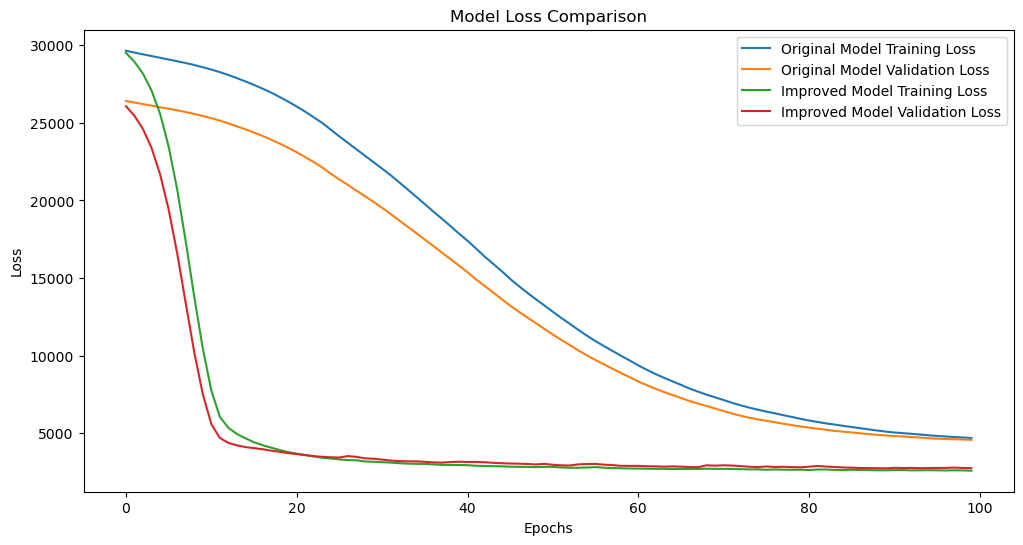

In [18]:
# Step 6: Improving the Model

# Trying a deeper network architecture with more hidden layers
model_deeper = Sequential()

# Input layer and two hidden layers
model_deeper.add(Dense(128, activation='relu', input_shape=(X_scaled.shape[1],)))
model_deeper.add(Dense(64, activation='relu'))

# Output layer
model_deeper.add(Dense(1))

# Compile the deeper model
model_deeper.compile(optimizer='adam', loss='mean_squared_error')

# Train the deeper model
print("\nTraining the improved ANN model...")
history_deeper = model_deeper.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the improved model on the test set
y_pred_deeper = model_deeper.predict(X_test)

# Calculate the performance metrics
mse_deeper = mean_squared_error(y_test, y_pred_deeper)
r2_deeper = r2_score(y_test, y_pred_deeper)

print(f"\nImproved Model Performance on Testing Data:")
print(f"Mean Squared Error (MSE): {mse_deeper:.2f}")
print(f"R² Score: {r2_deeper:.2f}")

# Plot training history for both models
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Original Model Training Loss')
plt.plot(history.history['val_loss'], label='Original Model Validation Loss')
plt.plot(history_deeper.history['loss'], label='Improved Model Training Loss')
plt.plot(history_deeper.history['val_loss'], label='Improved Model Validation Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()